In [1]:
import pandas as pd
import math

mainData = pd.read_csv("/Users/Yahya/Desktop/CE/JpyNote/Statistics Project/globalterrorismdb_0718dist.csv", engine='python')
mainData=mainData.rename(columns={'iyear': 'year' })
year=mainData.year

In [2]:
def Mean(data):
    mean=sum(data)/len(data)
    return(mean)

Mean(year)

2002.6389969783863

In [3]:
def Median(data):
    sortedData=data.sort_values()
    length = len(sortedData)
    if length % 2 == 0:
        tempFirst = sortedData[int(length/2)]
        tempSecond = sortedData[int(length/2)-1]
        median=(tempFirst + tempSecond)/2
        return(median)
    else:
        median=sortedData[int(length/2)]
        return(median)
        
Median(year)

2009

In [4]:
def Shape(data):
    if Mean(data)==Median(data):
        return "symmetric"
    if Mean(data)>Median(data):
        return "right-skewed"
    if Mean(data)<Median(data):
        return "left-skewed"
    
Shape(year)

'left-skewed'

In [5]:
def Variance(data):
    length = len(data)
    mean=Mean(data)
    deviations = [pow((x - mean),2) for x in data]
    variance = sum(deviations) / length
    return variance

Variance(year)

175.8115286439676

In [6]:
def Stdev(data):
    variance = Variance(data)
    stdDev = math.sqrt(variance)
    return stdDev

Stdev(year)

13.259393977251284

In [7]:
def StanErr(data):
    stdDev=Stdev(data)
    length = len(data)
    stanErr=stdDev/math.sqrt(length)
    return stanErr

StanErr(year)

0.031106916785692926

In [8]:
def Outlier(data):
    outliers=[]
    outCount=0
    sortedData=data.sort_values()
    Q1=sortedData[int((len(sortedData)+1)/4)]
    Q3=sortedData[int((len(sortedData)*3)/4)]
    IQR = Q3-Q1
    lower = Q1-(1.5*(IQR))
    upper = Q3+(1.5*(IQR))
    for x in sortedData:
        if x < lower or x > upper:
            outliers.append(x)
            outCount+=1
    if outCount==0:
        return "No outlier found on data."
    else:
        return "Number of outliers: ", outCount, outliers
    

Outlier(year)

'No outlier found on data.'

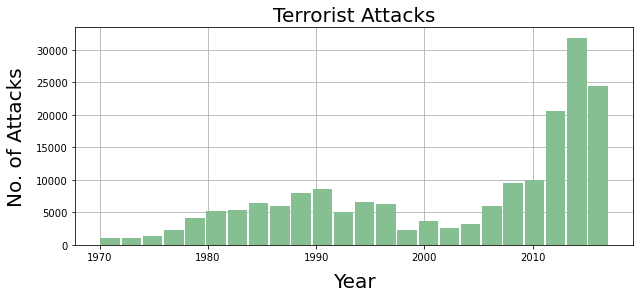

In [9]:
def drawHist(data):
    edt =data.hist(bins=24, grid=True, figsize=(10,4), color='#86bf91', zorder=4, rwidth=0.92)
    edt.set_title("Terrorist Attacks", size=20)
    edt.set_xlabel("Year", labelpad=10, size=20)
    edt.set_ylabel("No. of Attacks", labelpad=10, size=20)
    
drawHist(year)

In [ ]:
def drawBoxByMainData(data):
    string = input()
    data.boxplot(column=string,rot=45,fontsize=15,figsize=(8,5))
    
drawBoxByMainData(mainData)

In [94]:
def findConfidenceInterval95(data,n):
    conf=1.96
    datan=data.sample(n)
    m=Mean(datan)
    v=Variance(datan)
    stdDev=Stdev(data)
    se=stdDev/math.sqrt(n)
    he=se*conf
    return"of sample mean=",(m-he, m+he),"of sample variance=",(v-he, v+he)

findConfidenceInterval95(year,50000)

('of sample mean=',
 (2002.4768162874075, 2002.7092637125925),
 'of sample variance=',
 (175.9400398458199, 176.1724872710048))

In [97]:
def findSample01marg90(data):
    marg=0.1
    conf=1.645
    stdDev=Stdev(data)
    nmin=pow(((conf*stdDev)/marg),2)
    return int(nmin)+1

findSample01marg90(year)
    
    

47576